# Imports 

In [1]:
print('hi')

hi


In [51]:
import sys
sys.path

done


/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/circle_grape_v3.py:419: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if int(around(self.nqinit,0)) is 0:


['/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow',
 '/home/eag190/miniconda3/envs/simulations/lib/python39.zip',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/lib-dynload',
 '',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages',
 '/cache/home/eag190/ECD_control',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages/quantum_optimal_control-0.1.0-py3.9.egg']

In [52]:
%matplotlib inline
import os
import sys
import inspect
import numpy as np
from scipy.special import factorial
import h5py

#data_path = '/data'     ... data path specified later
#data_path
#initial_pulse = '../pulses/example_pulses/transmon_cat_initial_pulse.h5'
from h5py import File
import matplotlib.pyplot as plt
from pylab import*
from qutip import*

from scipy import interpolate
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font)


In [53]:
from quantum_optimal_control.helper_functions.grape_functions import *
from quantum_optimal_control.main_grape.grape import Grape
from quantum_optimal_control import*

In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}
\newcommand{\bra}[1]{\left\langle{#1}\right|}$$

# 3DMM2 parameters

In [55]:
# chi = Peak splitting MHz
chis = 2*array([-33, -33]) 
kappas  = array([0,0]) # kHz

# Multimode circle grape

In [56]:
#TODO: Figure out why relative import doesn't work
from circle_grape_v3 import *

In [57]:
transmon_levels = 2

#  Params :  $\alpha = 30.0 , \delta_c = -0.030$ GHz, $\tau = 500$ ns, $\Omega_{max} =1$ MHz

In [58]:
mode = 1
mode_levels = 10
chi,kappa = chis[mode]*1e-6,kappas[mode]*1e-6
circle_grape_params = {"chis":[chi],"kappas":[kappa],"alpha":30.0,"delta_c":0}

op = multimode_circle_grape_optimal_control(mode_state_num = mode_levels,
                                            number_of_modes = 1,hparams = circle_grape_params,add_disp_kerr=False)




In [59]:
import sys
sys.path

['/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow',
 '/home/eag190/miniconda3/envs/simulations/lib/python39.zip',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/lib-dynload',
 '',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages',
 '/cache/home/eag190/ECD_control',
 '/home/eag190/miniconda3/envs/simulations/lib/python3.9/site-packages/quantum_optimal_control-0.1.0-py3.9.egg']

In [60]:
data_path = ''#'/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'

In [65]:
states_forbidden_list = []
total_time = 1000.0
steps  = 200 #number of points over the total time where amplitudes will be specified

convergence = {'rate': 0.1, 'update_step': 10, 'max_iterations': 1000,
               'conv_target': 3e-4, 'learning_rate_decay': 500.0}


reg_coeffs = {'dwdt': 0.1, 'd2wdt2': 1.0e-3, 'forbid_dressed': False,
              'states_forbidden_list':states_forbidden_list,
              'forbidden_coeff_list': [1.0*steps] * len(states_forbidden_list)}



initial_guess = None

# ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
#                         total_time = total_time, steps = steps,max_amp = 0.001, 
#                         taylor_terms = None,is_dressed=False, 
#                         convergence = convergence, reg_coeffs =  reg_coeffs,
#                         plot_only_g = True,
#                         states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
#                         file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)

In [66]:
hf = op.openfile()
min(hf['error'])

0.96974164

data saved at: 00024_g0_to_g1_circlgrape.h5


[0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]

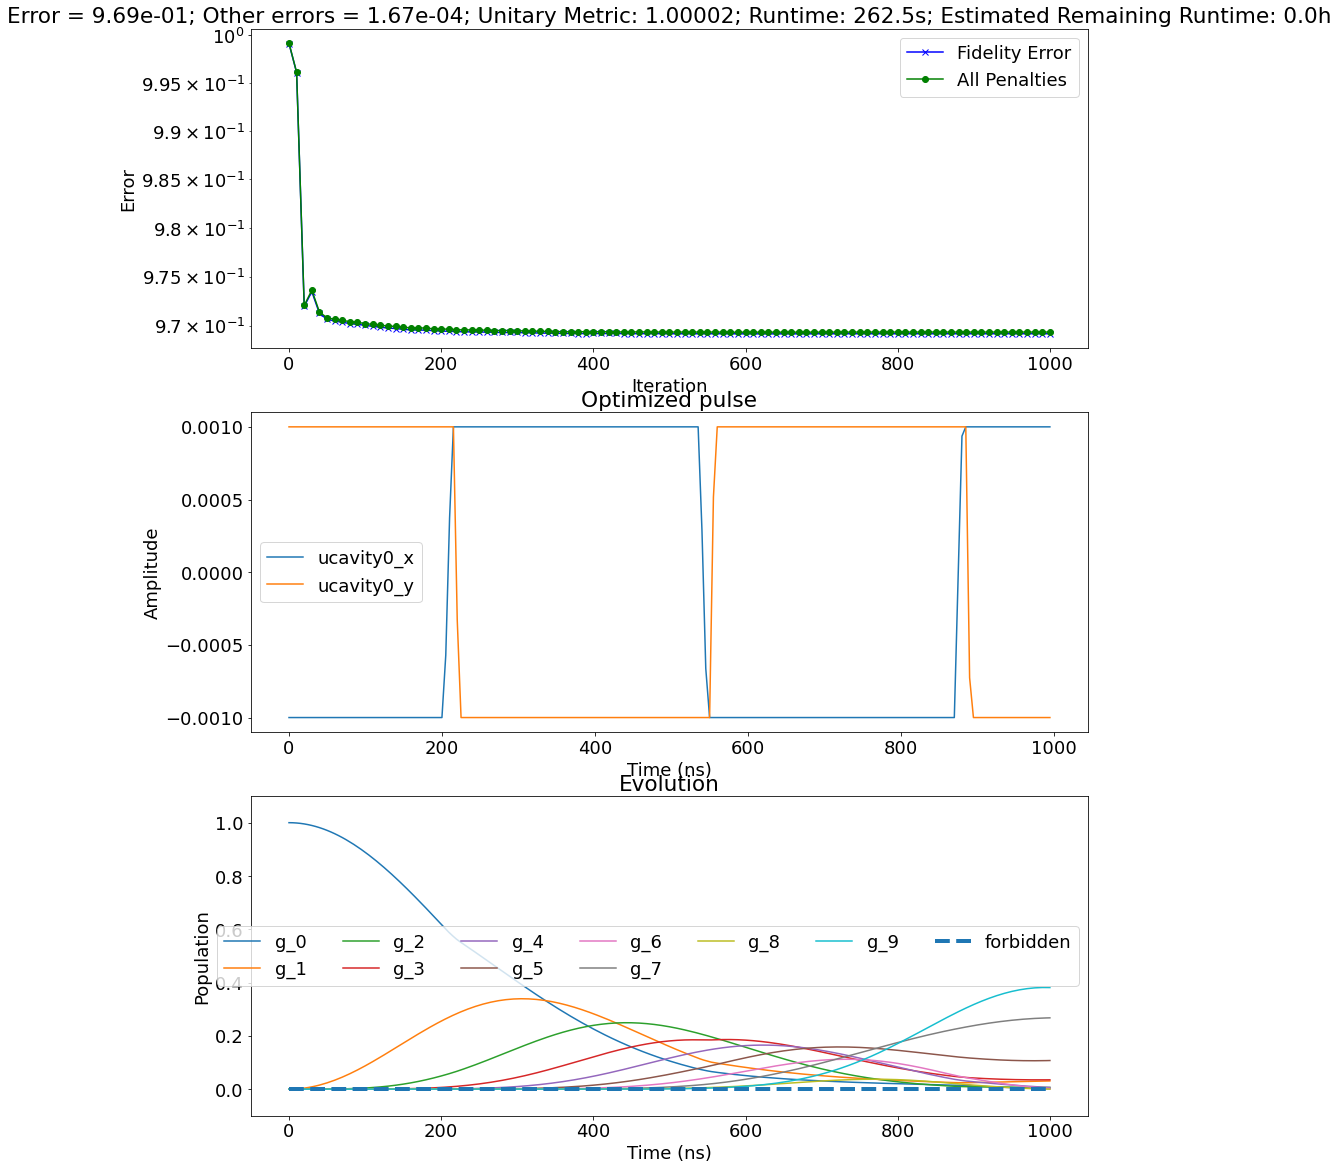

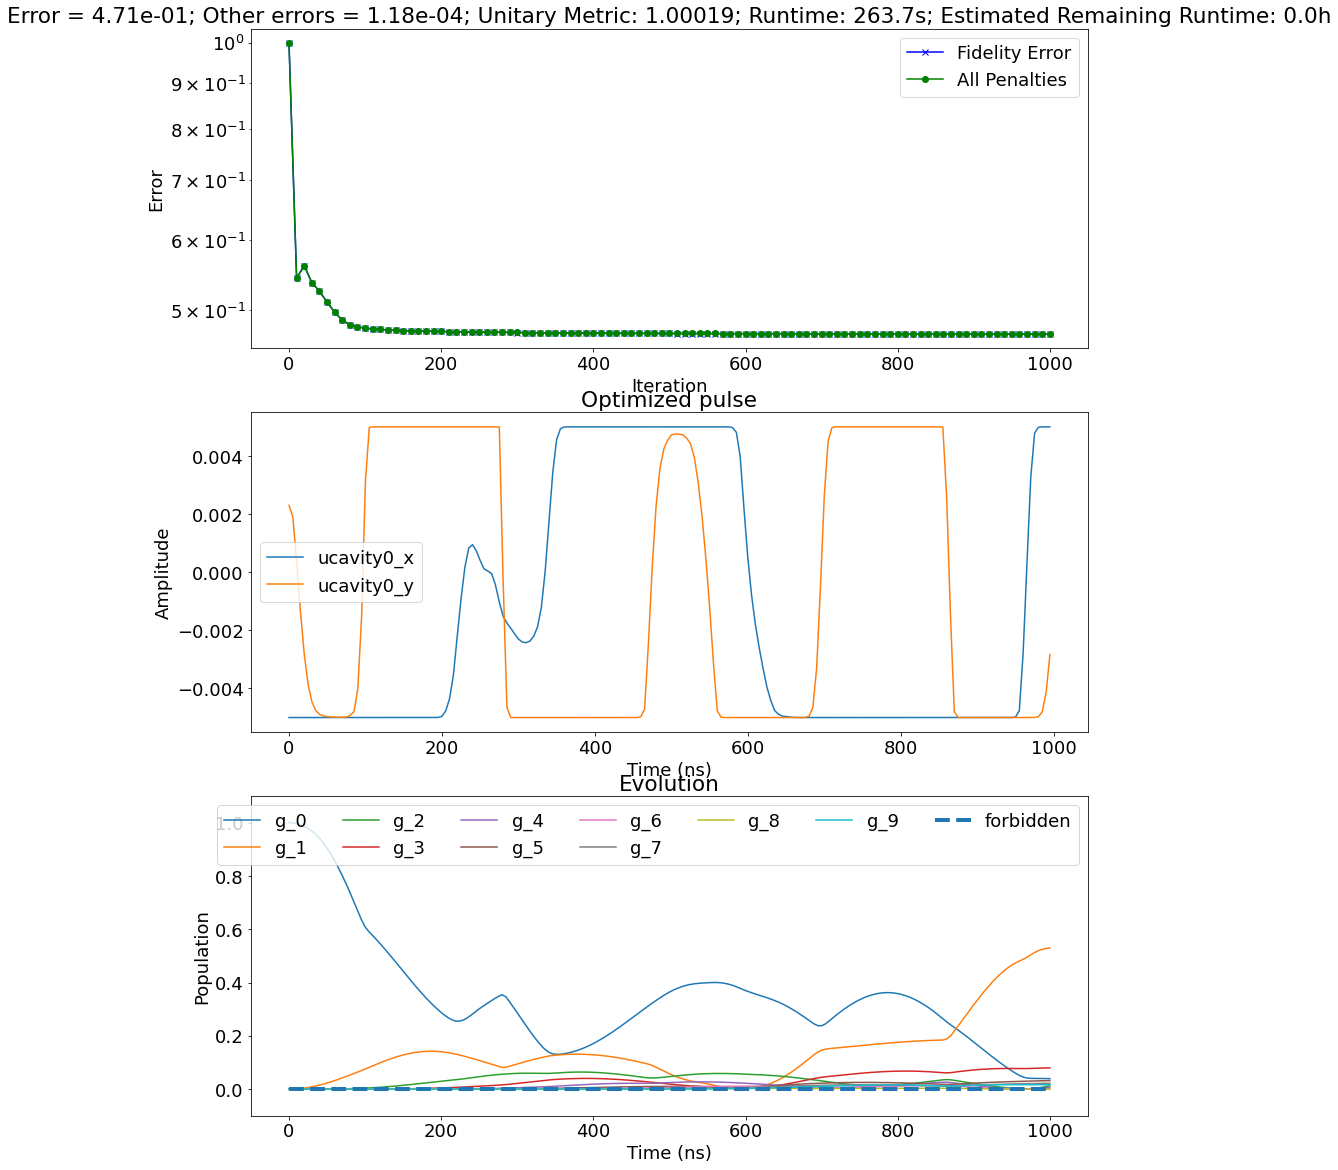

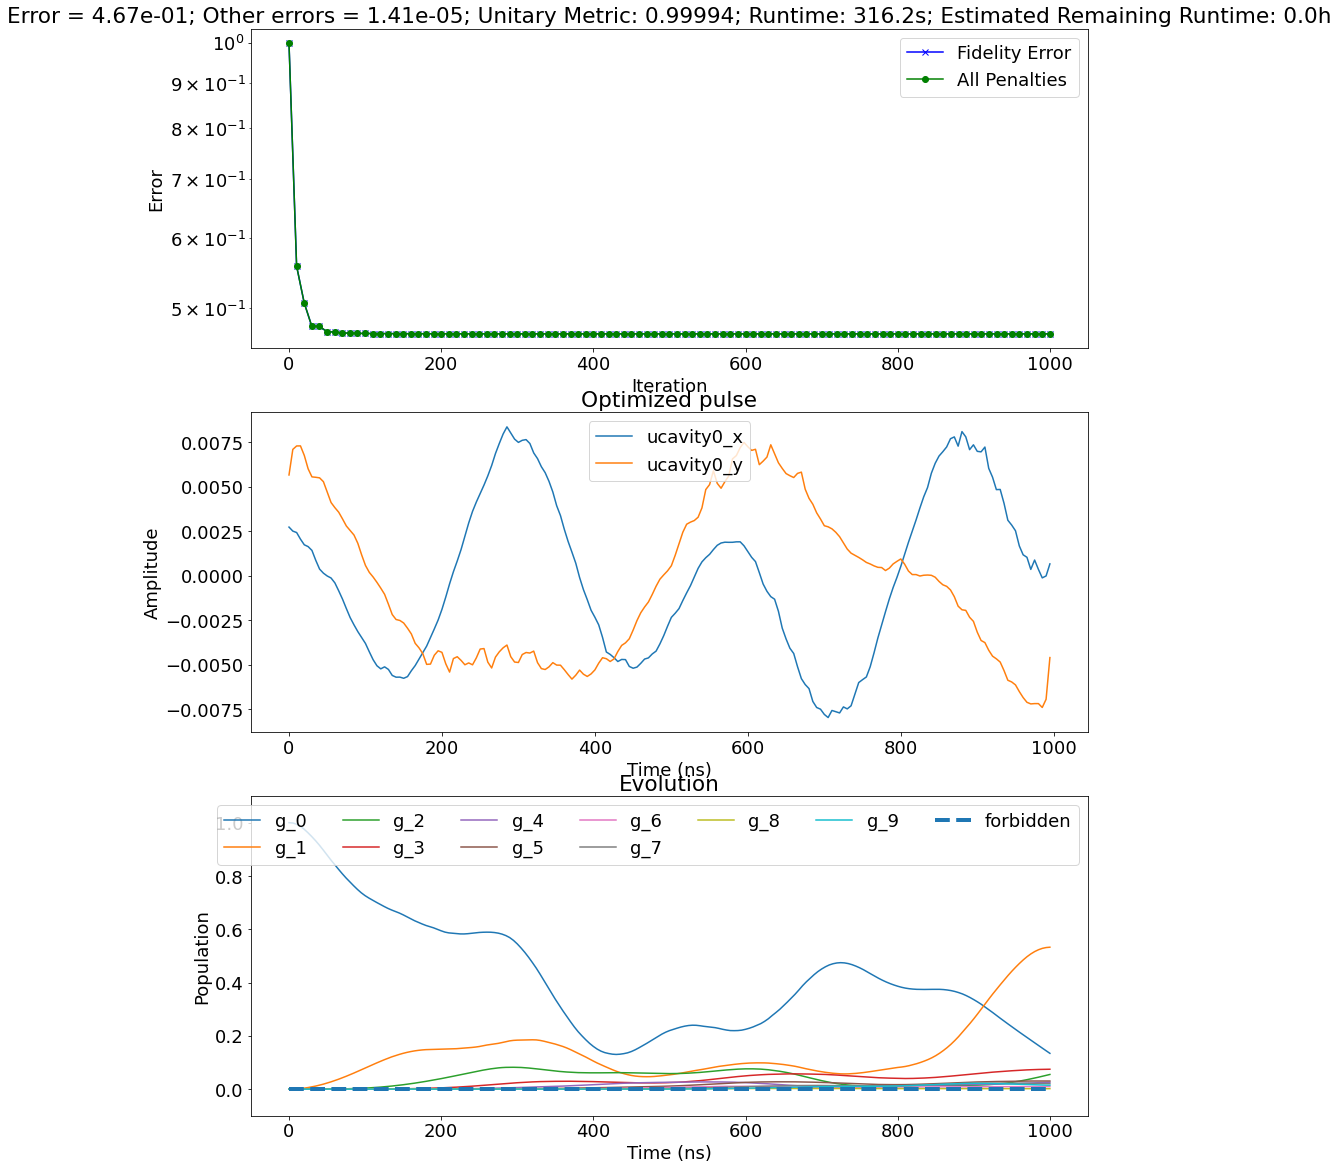

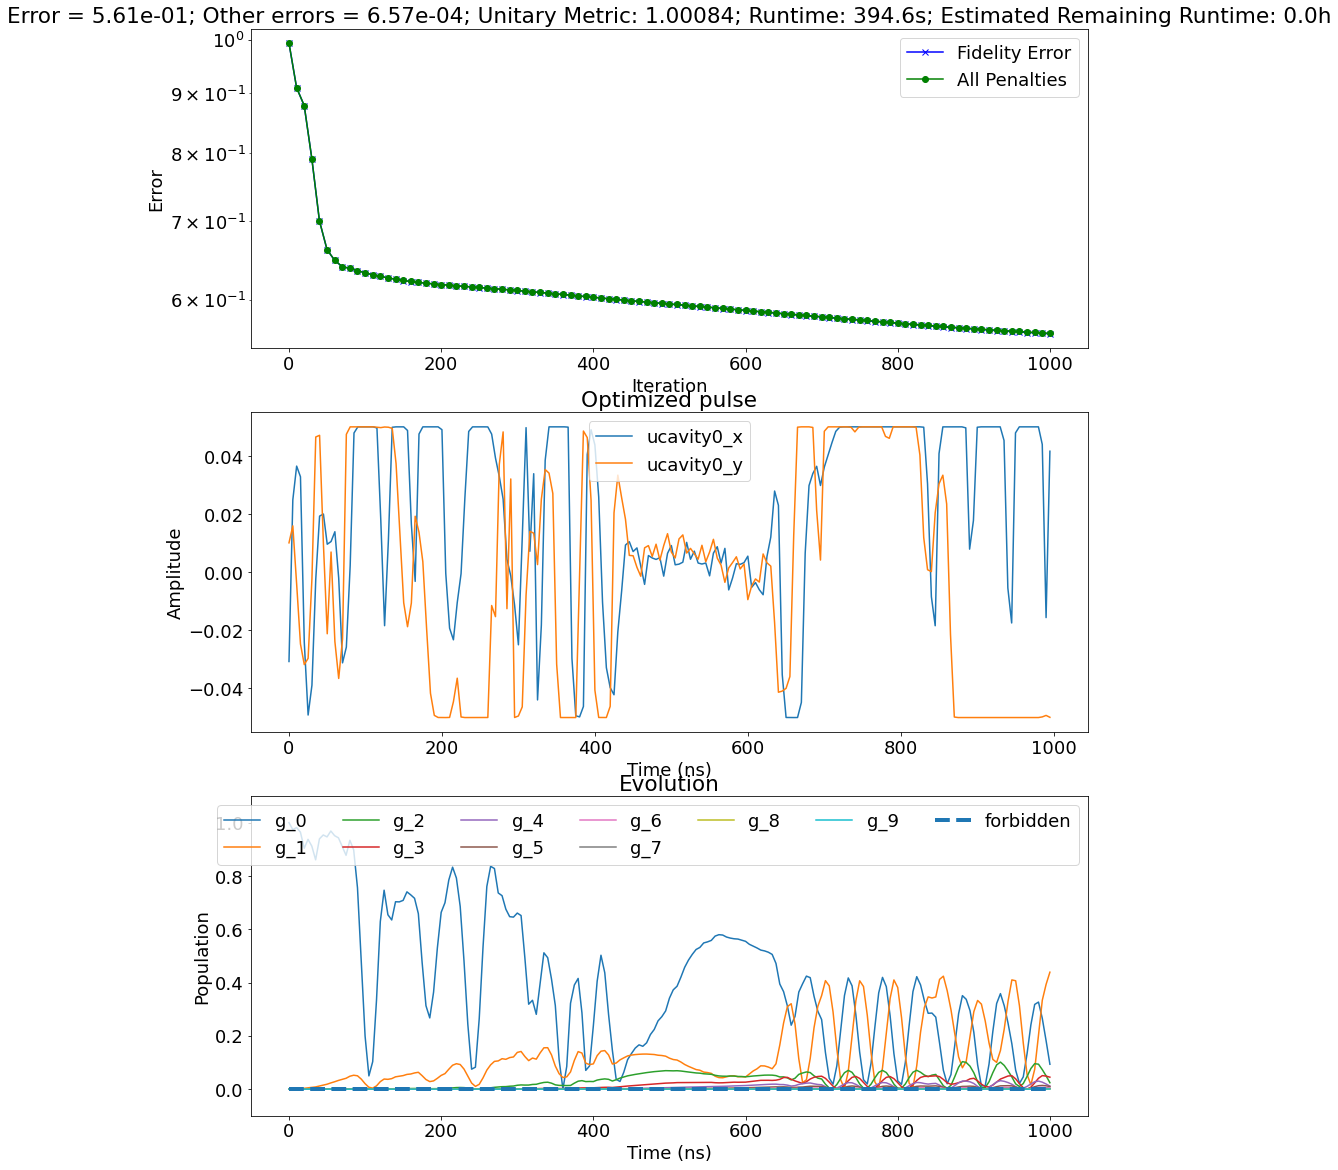

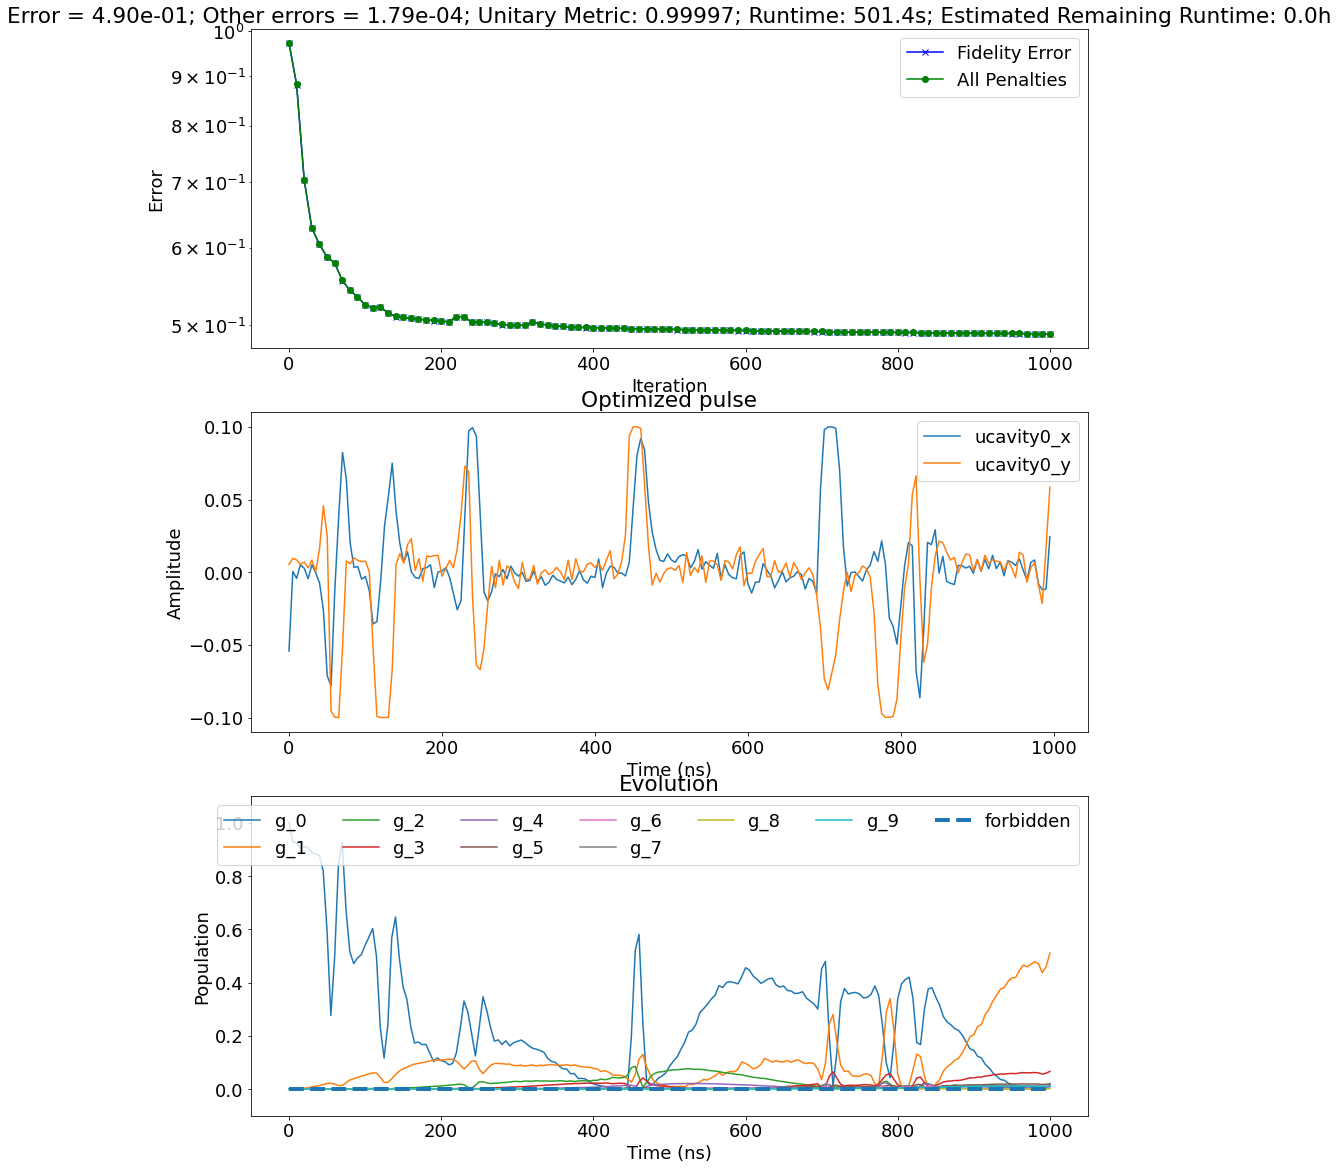

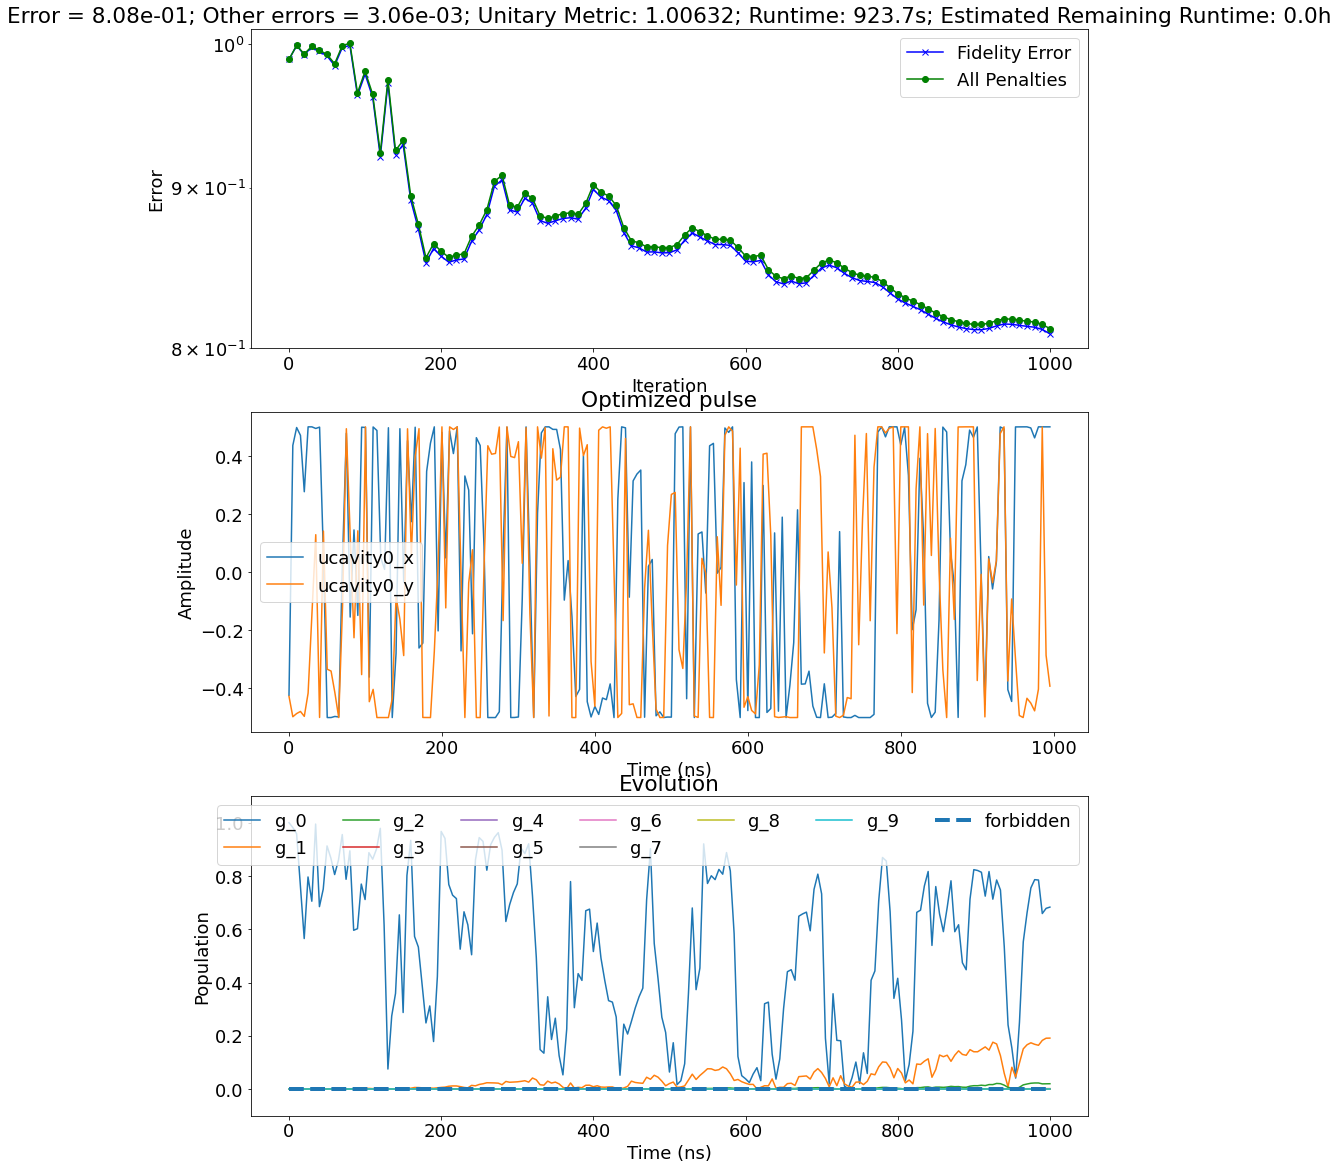

In [67]:
amps = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
fids = []
for a in amps:
    ss = op.run_optimal_control(state_transfer = True, initial_states = [0], target_states = [1], 
                            total_time = total_time, steps = steps,max_amp = a, 
                            taylor_terms = None,is_dressed=False, 
                            convergence = convergence, reg_coeffs =  reg_coeffs,
                            plot_only_g = True,
                            states_forbidden_list = states_forbidden_list,initial_guess = initial_guess, 
                            file_name="g0_to_g1_circlgrape", data_path=data_path, save = True)
    hf = op.openfile()
    fids.append(min(hf['error']))
fids

In [ ]:
fids

Text(0, 0.5, 'errors')

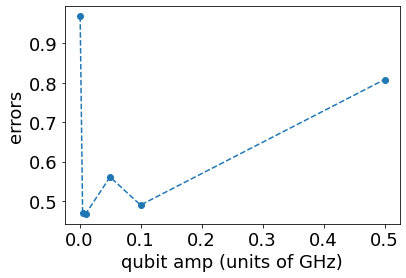

In [68]:
import matplotlib.pyplot as plt
plt.plot(amps, fids, marker = 'o', linestyle = '--')
plt.xlabel('qubit amp (units of GHz)')
plt.ylabel('errors')

In [3]:
import numpy as np 
np.log10(10)

1.0

Text(0.5, 1.0, 'g0->g1; 1000 microseconds')

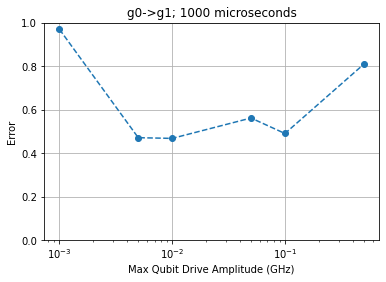

In [11]:
import matplotlib.pyplot as plt
amps = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5]
errs= [0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]
plt.semilogx(amps, errs, marker = 'o', linestyle = '--')
plt.grid(True)
#plt.plot(amps, fids, )
plt.xlabel('Max Qubit Drive Amplitude (GHz)')
plt.ylabel('Error')
plt.ylim([0,1])
plt.title('g0->g1; 1000 microseconds')

[0.96918666, 0.4705422, 0.4672778, 0.5610303, 0.4898126, 0.8084305]

In [ ]:
hf = op.openfile()

In [ ]:
hf['error'][-1]

In [ ]:
op.plot_pulses()

In [ ]:
ss

In [ ]:
len(ss[0][0])

In [ ]:
op.fidelity()

In [ ]:
import os 
data_path = '/home/eag190/Multimode-Conditional-Displacements/hpc_runs/multimode_circle_grape/sample workflow/data'
file_path = 'test.h5'
file_path_f = os.path.join(data_path, file_path)
file_path_f

In [ ]:
hf = h5py.File(file_path_f, 'w')


In [ ]:
get_dressed_info

In [ ]:
w_c, v_c, dressed_id = get_dressed_info(op.H_rot())

In [ ]:
w_c

In [ ]:
v_c

In [ ]:
dressed_id